## Подготовка данных

### Предобработка данных

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

Откроем файл и выведем первые 10 строк:

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except ValueError:
    print('Неверный тип переменных')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Сделаем проверку данных:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Приведем названия столбцов к "змеиному регистру":

In [4]:
df.columns = df.columns.str.lower()
df.rename(columns = {
    
    'rownumber' : 'row_number',
    'customerid' : 'customer_id',
    'creditscore' : 'credit_score',
    'numofproducts' : 'num_of_products',
    'hascrcard' : 'has_cr_card',
    'isactivemember' : 'is_active_member',
    'estimatedsalary' : 'estimated_salary'
    
}, inplace = True)

In [5]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Проверим данные на дубликаты:

In [6]:
df.duplicated().value_counts()

False    10000
dtype: int64

Дубликатов нет. 

Также можно заметить, что в столбцах, кроме `tenure`, пропусков нет. Проверим, можем ли мы заменить пропуски в данном столбце на медианные значения:

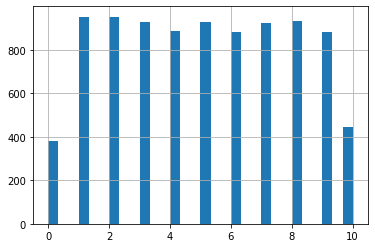

In [7]:
df['tenure'].hist(bins = 30);

Из гистограммы следует, что при разбиении клиентов на группы, кто сколько является клиентом банка, мы получили практически равномерное распределение. Таким образом, нельзя заменить пропуски на определенное значение.

Определим, какую часть составляют пропуски от общего количества строк в столбце `tenure`:

In [8]:
1 - len(df[df['tenure'] >= 0]) / len(df['tenure'])

0.09089999999999998

Пропуски составляют примерно 9.1%, менее 10%. Таким образом, можно удалить строки с пропусками:

In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        9091 non-null   int64  
 1   customer_id       9091 non-null   int64  
 2   surname           9091 non-null   object 
 3   credit_score      9091 non-null   int64  
 4   geography         9091 non-null   object 
 5   gender            9091 non-null   object 
 6   age               9091 non-null   int64  
 7   tenure            9091 non-null   float64
 8   balance           9091 non-null   float64
 9   num_of_products   9091 non-null   int64  
 10  has_cr_card       9091 non-null   int64  
 11  is_active_member  9091 non-null   int64  
 12  estimated_salary  9091 non-null   float64
 13  exited            9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


Проверим еще раз данные в столбце `tenure`:

In [10]:
df['tenure'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Данные в столбце - целочисленного типа, хотя принадлежат `float`. Переведем их в тип `int`:

In [11]:
df['tenure'] = df['tenure'].astype('int')
df['tenure']

0        2
1        1
2        8
3        1
4        2
        ..
9994     2
9995     5
9996    10
9997     7
9998     3
Name: tenure, Length: 9091, dtype: int64

Также можем заметить, что столбцы `row_number`, `customer_id ` и `surname` содержат только персональную информацию о клиентах и не влияют на `exited`. Удалим эти столбцы:

In [12]:
df = df.drop(['row_number', 'customer_id', 'surname'], axis = 1)
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Подготовка признаков

Для категоральных признаков применик технику OHE:

In [13]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Подготовка данных

Целевой признак - столбец `exited`, выделим его отдельно из выборки (`target`), остальные признаки отнесем в выборку `features`: 

In [14]:
target = df['exited']
features = df.drop(['exited'], axis = 1)

Разделим выборку на обучаемую, валидационную и тестовую в состношении 3:1:1, сделаем проверку:

In [15]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.2, random_state = 12345, stratify = target)

features_train, features_test, target_train, target_test = train_test_split(
    features_train, target_train, test_size = 0.25, random_state = 12345, stratify = target_train)

print(len(features_train) / len(features))
print(len(features_test) / len(features))
len(features_valid) / len(features)

0.5999340006599934
0.1999780002199978


0.2000879991200088

Для всех численных признаков примем одинаковый масштаб:

In [16]:
scaler = StandardScaler()
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

pd.options.mode.chained_assignment = None

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

### Анализ дисбаланса классов

Проанализируем дисбаланс классов:

In [17]:
df_zeros = df[target == 0]
df_ones = df[target == 1]
print(df_zeros.shape)
print(df_ones.shape)

(7237, 12)
(1854, 12)


Значений с `target = 1` меньше примерно в 4 раза, в процессе улучшения модели будем учитывать данный дисбаланс.

Обучим модель на выборке `train` на моделях `DT`, `LR` и `RF` и проверим на `valid`. Определим модель с наилучшими значениями `f1` и `auc-roc`, а также определим гиперпараметры, при которых это значение максимально.

### Модель DT

Проведем обучение на модели `DT`. Будем менять параметр `max_depth` и определим качество данной модели (наибольшие значения `f1` и `auc-roc`), а также создадим список `list_f1_auc_roc_DecisionTreeClassifier_valid`, содержащий значения `f1` и `auc-roc`, а также определим значение `max_depth`, при котором достигаются максимальные значения `f1` и `auc-roc` на обучающей выборке при данном алгоритме:  

In [18]:
result_f1_DecisionTreeClassifier_valid = 0
result_auc_roc_DecisionTreeClassifier_valid = 0
result_f1_auc_roc_DecisionTreeClassifier_valid = 0
depth_f1_DecisionTreeClassifier_valid = 0
depth_auc_roc_DecisionTreeClassifier_valid = 0
list_f1_auc_roc_DecisionTreeClassifier_valid = []

for depth in range(1, len(target_valid)):
    
    model_DecisionTreeClassifier_valid = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model_DecisionTreeClassifier_valid.fit(features_train, target_train)
    answer_DecisionTreeClassifier_valid = model_DecisionTreeClassifier_valid.predict(features_valid)
    f1_DecisionTreeClassifier_valid = sklm.f1_score(target_valid, answer_DecisionTreeClassifier_valid)
    auc_roc_DecisionTreeClassifier_valid = sklm.roc_auc_score(target_valid, answer_DecisionTreeClassifier_valid)
    
    list_f1_auc_roc_DecisionTreeClassifier_valid.append([f1_DecisionTreeClassifier_valid, 
                                                         auc_roc_DecisionTreeClassifier_valid,
                                                         depth])
    
for index in range(len(list_f1_auc_roc_DecisionTreeClassifier_valid)):
    if result_f1_DecisionTreeClassifier_valid < list_f1_auc_roc_DecisionTreeClassifier_valid[index][0]:
        result_f1_DecisionTreeClassifier_valid = list_f1_auc_roc_DecisionTreeClassifier_valid[index][0]
        depth_f1_DecisionTreeClassifier_valid = list_f1_auc_roc_DecisionTreeClassifier_valid[index][2]
    if result_auc_roc_DecisionTreeClassifier_valid < list_f1_auc_roc_DecisionTreeClassifier_valid[index][1]:
        result_auc_roc_DecisionTreeClassifier_valid = list_f1_auc_roc_DecisionTreeClassifier_valid[index][1]
        depth_auc_roc_DecisionTreeClassifier_valid = list_f1_auc_roc_DecisionTreeClassifier_valid[index][2]
        
print('Наибольшее значение f1-меры:', result_f1_DecisionTreeClassifier_valid, 
      ', Значение depth:', depth_f1_DecisionTreeClassifier_valid)
print('Наибольшее значение auc_roc:', result_auc_roc_DecisionTreeClassifier_valid, 
      ', Значение depth:', depth_auc_roc_DecisionTreeClassifier_valid)

Наибольшее значение f1-меры: 0.5745682888540031 , Значение depth: 7
Наибольшее значение auc_roc: 0.7179705067683281 , Значение depth: 7


Таким образом, наибольшие значения f1-меры и auc-roc достигались при значении depth - 7

### Модель LR

Проведем обучение на модели `LR`. Будем менять параметры `max_iter` и `solver` и определим качество данной модели (наибольшие значения `f1` и `auc-roc`), а также создадим список `list_f1_auc_roc_LogisticRegression_valid`, содержащий значения `f1` и `auc-roc`, а также определим значения `max_iter` и `solver`, при которых достигается максимальное значение `accuracy` на обучающей выборке при данном алгоритме (значение `max_iter` на 1 больше порядка в списке):  

In [19]:
result_f1_LogisticRegression_valid = 0
result_auc_roc_LogisticRegression_valid = 0
index_result = 0
list_f1_auc_roc_LogisticRegression_valid = []
list_solvers_LogisticRegression_valid = ['liblinear', 'lbfgs'] 

for iteration in range(100, 1000, 20):
    for solv in list_solvers_LogisticRegression_valid:
    
        model_LogisticRegression_valid = LogisticRegression(random_state = 12345, solver = solv, max_iter = iteration)
        model_LogisticRegression_valid.fit(features_train, target_train)
        answer_LogisticRegression_valid = model_LogisticRegression_valid.predict(features_valid)
        result_f1_LogisticRegression_valid = sklm.f1_score(target_valid, answer_LogisticRegression_valid)
        result_auc_roc_LogisticRegression_valid = sklm.roc_auc_score(target_valid, answer_LogisticRegression_valid)
        
        list_f1_auc_roc_LogisticRegression_valid.append([result_f1_LogisticRegression_valid, 
                                                         result_auc_roc_LogisticRegression_valid])
    
for index in range(len(list_f1_auc_roc_LogisticRegression_valid)):
    
        if result_f1_LogisticRegression_valid < list_f1_auc_roc_LogisticRegression_valid[index][0]:
            result_f1_LogisticRegression_valid = list_f1_auc_roc_LogisticRegression_valid[index][0]
            
        if result_auc_roc_LogisticRegression_valid < list_f1_auc_roc_LogisticRegression_valid[index][1]:
            result_auc_roc_LogisticRegression_valid = list_f1_auc_roc_LogisticRegression_valid[index][1]

print('Наибольшее значение f1-меры: ', result_f1_LogisticRegression_valid)
print('Наибольшее значение auc-roc: ', result_auc_roc_LogisticRegression_valid)

for index in range(len(list_f1_auc_roc_LogisticRegression_valid)):
    if (list_f1_auc_roc_LogisticRegression_valid[index][0] == result_f1_LogisticRegression_valid 
        and index % 2 == 0):            
        print('Лучшее значение гиперпараметра max_iter:', index + 1)
        print('Лучшее значение f1-меры на решателе: liblinear')
    elif (list_f1_auc_roc_LogisticRegression_valid[index][0] == result_f1_LogisticRegression_valid 
        and index % 2 == 1):  
        print('Лучшее значение гиперпараметра max_iter:', index + 1)
        print('Лучшее значение f1-меры на решателе: lbfgs')
        
    if (list_f1_auc_roc_LogisticRegression_valid[index][1] == result_auc_roc_LogisticRegression_valid 
        and index % 2 == 0):            
        print('Лучшее значение гиперпараметра max_iter:', index + 1)
        print('Лучшее значение auc-roc на решателе: liblinear')
    elif (list_f1_auc_roc_LogisticRegression_valid[index][1] == result_auc_roc_LogisticRegression_valid 
        and index % 2 == 1):  
        print('Лучшее значение гиперпараметра max_iter:', index + 1)
        print('Лучшее значение auc-roc на решателе: lbfgs')

Наибольшее значение f1-меры:  0.33918128654970764
Наибольшее значение auc-roc:  0.5982589611472651
Лучшее значение гиперпараметра max_iter: 1
Лучшее значение f1-меры на решателе: liblinear
Лучшее значение гиперпараметра max_iter: 1
Лучшее значение auc-roc на решателе: liblinear
Лучшее значение гиперпараметра max_iter: 2
Лучшее значение f1-меры на решателе: lbfgs
Лучшее значение гиперпараметра max_iter: 2
Лучшее значение auc-roc на решателе: lbfgs
Лучшее значение гиперпараметра max_iter: 3
Лучшее значение f1-меры на решателе: liblinear
Лучшее значение гиперпараметра max_iter: 3
Лучшее значение auc-roc на решателе: liblinear
Лучшее значение гиперпараметра max_iter: 4
Лучшее значение f1-меры на решателе: lbfgs
Лучшее значение гиперпараметра max_iter: 4
Лучшее значение auc-roc на решателе: lbfgs
Лучшее значение гиперпараметра max_iter: 5
Лучшее значение f1-меры на решателе: liblinear
Лучшее значение гиперпараметра max_iter: 5
Лучшее значение auc-roc на решателе: liblinear
Лучшее значение г

Таким образом, модель не зависит от гиперпараметров `max_iter` и `solver`. Проверим, итерируются ли значения `f1-меры` и `auc-roc` при изменении параметра `C`, а также определим значение данного параметра:

In [20]:
result_f1_LogisticRegression_valid = 0
result_auc_roc_LogisticRegression_valid = 0
c_f1_LogisticRegression_valid = 0
c_auc_roc_LogisticRegression_valid = 0
list_f1_auc_roc_LogisticRegression_valid = []

for value in range(1, 100):
      
    model_LogisticRegression_valid = LogisticRegression(random_state = 12345, C = value / 100)
    model_LogisticRegression_valid.fit(features_train, target_train)
    answer_LogisticRegression_valid = model_LogisticRegression_valid.predict(features_valid)
    result_f1_LogisticRegression_valid = sklm.f1_score(target_valid, answer_LogisticRegression_valid)
    result_auc_roc_LogisticRegression_valid = sklm.roc_auc_score(target_valid, answer_LogisticRegression_valid)
        
    list_f1_auc_roc_LogisticRegression_valid.append([result_f1_LogisticRegression_valid, 
                                                         result_auc_roc_LogisticRegression_valid])

for index in range(len(list_f1_auc_roc_LogisticRegression_valid)):
    if result_f1_LogisticRegression_valid < list_f1_auc_roc_LogisticRegression_valid[index][0]:
        result_f1_LogisticRegression_valid = list_f1_auc_roc_LogisticRegression_valid[index][0]
        c_f1_LogisticRegression_valid = index / 100
    if result_auc_roc_LogisticRegression_valid < list_f1_auc_roc_LogisticRegression_valid[index][1]:
        result_auc_roc_LogisticRegression_valid = list_f1_auc_roc_LogisticRegression_valid[index][1]
        c_auc_roc_LogisticRegression_valid = index / 100
        
print('Наибольшее значение f1-меры:', result_f1_LogisticRegression_valid, 
      ', Значение C:', c_f1_LogisticRegression_valid)
print('Наибольшее значение auc_roc:', result_auc_roc_LogisticRegression_valid, 
      ', Значение C:', c_auc_roc_LogisticRegression_valid)

Наибольшее значение f1-меры: 0.34184675834970535 , Значение C: 0.15
Наибольшее значение auc_roc: 0.5996401766168784 , Значение C: 0.15


Таким образом, при изменении параметра `C`, значения `f1-меры` и `auc-roc`итерируются, при этом удалось немного увеличить их значения. Значения параметра `C` при этом - 0.15

### Модель RF

Проведем обучение на модели `RF`. Будем менять параметры `max_depth` и `n_estimators` и определим качество данной модели (наибольшие значения `f1` и `auc-roc`), а также создадим список `list_f1_auc_roc_RandomForestClassifier_valid`, содержащий значения `f1`, `auc-roc`, `n_estimators` и `max_depth`, а также определим значения `max_depth` и `n_estimators`, при которых достигаются максимальные значения `f1` и `auc-roc` на обучающей выборке при данной модели:  

In [21]:
result_f1_RandomForestClassifier_valid = 0
result_auc_roc_RandomForestClassifier_valid = 0
est_f1_RandomForestClassifier_valid = 0
est_auc_roc_RandomForestClassifier_valid = 0
depth_f1_RandomForestClassifier_valid = 0
depth_auc_roc_RandomForestClassifier_valid = 0
auc_roc_f1_RandomForestClassifier_valid = 0
f1_auc_roc_RandomForestClassifier_valid = 0
list_f1_auc_roc_RandomForestClassifier_valid = []

for est in range(1, 50):
    for depth in range(1, 10):
    
        model_RandomForestClassifier_valid = RandomForestClassifier(random_state = 12345, n_estimators = est, 
                                                                    max_depth = depth)
        model_RandomForestClassifier_valid.fit(features_train, target_train)
        answer_RandomForestClassifier_valid = model_RandomForestClassifier_valid.predict(features_valid)
        f1_RandomForestClassifier_valid = sklm.f1_score(target_valid, answer_RandomForestClassifier_valid)
        auc_roc_RandomForestClassifier_valid = sklm.roc_auc_score(target_valid, answer_RandomForestClassifier_valid)
    
        list_f1_auc_roc_RandomForestClassifier_valid.append([f1_RandomForestClassifier_valid, 
                                                             auc_roc_RandomForestClassifier_valid, 
                                                             est, depth])

for index in range(len(list_f1_auc_roc_RandomForestClassifier_valid)):
    if result_f1_RandomForestClassifier_valid < list_f1_auc_roc_RandomForestClassifier_valid[index][0]:
        result_f1_RandomForestClassifier_valid = list_f1_auc_roc_RandomForestClassifier_valid[index][0]
        auc_roc_f1_RandomForestClassifier_valid = list_f1_auc_roc_RandomForestClassifier_valid[index][1]
        est_f1_RandomForestClassifier_valid = list_f1_auc_roc_RandomForestClassifier_valid[index][2]
        depth_f1_RandomForestClassifier_valid = list_f1_auc_roc_RandomForestClassifier_valid[index][3]
    if result_auc_roc_RandomForestClassifier_valid < list_f1_auc_roc_RandomForestClassifier_valid[index][1]:
        result_auc_roc_RandomForestClassifier_valid = list_f1_auc_roc_RandomForestClassifier_valid[index][1]
        f1_auc_roc_RandomForestClassifier_valid = list_f1_auc_roc_RandomForestClassifier_valid[index][0]
        est_auc_roc_RandomForestClassifier_valid = list_f1_auc_roc_RandomForestClassifier_valid[index][2]
        depth_auc_roc_RandomForestClassifier_valid = list_f1_auc_roc_RandomForestClassifier_valid[index][3]
    
print('Лучшее значение f1-меры:', result_f1_RandomForestClassifier_valid, 
      ', n_estimators:', est_f1_RandomForestClassifier_valid, 
      ', max_depth:', depth_f1_RandomForestClassifier_valid, 
      ', auc-roc:', auc_roc_f1_RandomForestClassifier_valid)

print('Лучшее значение auc-roc:', result_auc_roc_RandomForestClassifier_valid, 
      ', n_estimators:', est_auc_roc_RandomForestClassifier_valid, 
      ', max_depth:', depth_auc_roc_RandomForestClassifier_valid, 
      ', f1:', f1_auc_roc_RandomForestClassifier_valid)

Лучшее значение f1-меры: 0.6054421768707483 , n_estimators: 11 , max_depth: 7 , auc-roc: 0.7264253324596803
Лучшее значение auc-roc: 0.733150846599455 , n_estimators: 1 , max_depth: 5 , f1: 0.5862068965517242


Мы получили различные лучшие значения `f1-меры` и `auc-roc` при различных значениях `n_estimators` и `max_depth`. Сравним разницу между ними:

In [22]:
print(0.6054421768707483 - 0.5862068965517242)
print(0.733150846599455 - 0.7264253324596803)

0.019235280319024106
0.006725514139774624


Метрика `f1-мера` уменьшается значительнее, при наилучшем значении `auc-roc`, чем наоборот. Таким образом, примем наилучшие гиперпараметры - `n_estimators` - 11, `max_depth` - 7.

Таким образом, наилучшей моделью примем модель `RF` со значениеми гиперпараметров `n_estimators` - 11, `max_depth` - 7. Определим основные метрики данной модели:

In [23]:
model_RandomForestClassifier_valid = RandomForestClassifier(random_state = 12345, n_estimators = 11, max_depth = 7)
model_RandomForestClassifier_valid.fit(features_train, target_train)
answer_RandomForestClassifier_valid = model_RandomForestClassifier_valid.predict(features_valid)

print('Полноста:', sklm.recall_score(target_valid, answer_RandomForestClassifier_valid))
print('Точность:', sklm.precision_score(target_valid, answer_RandomForestClassifier_valid))
print('F1-мера:', sklm.f1_score(target_valid, answer_RandomForestClassifier_valid))
print('AUC-ROC:', sklm.roc_auc_score(target_valid, answer_RandomForestClassifier_valid))
print('Accuracy:', sklm.accuracy_score(target_valid, answer_RandomForestClassifier_valid))

Полноста: 0.4797843665768194
Точность: 0.8202764976958525
F1-мера: 0.6054421768707483
AUC-ROC: 0.7264253324596803
Accuracy: 0.8724573941726224


## Борьба с дисбалансом

### Увеличение веса редкого класса

Придадим объектам редкого класса больший вес:

In [24]:
model_weight_valid = RandomForestClassifier(random_state = 12345, n_estimators = 11, max_depth = 7, class_weight = 'balanced')
model_weight_valid.fit(features_train, target_train)
answer_weight_valid = model_weight_valid.predict(features_valid)

print('AUC-ROC:', sklm.roc_auc_score(target_valid, answer_weight_valid))
print('F1-мера:', sklm.f1_score(target_valid, answer_weight_valid))
print('Полнота:', sklm.recall_score(target_valid, answer_weight_valid))
print('Точность:', sklm.precision_score(target_valid, answer_weight_valid))
print('Accuracy:', sklm.accuracy_score(target_valid, answer_weight_valid))

AUC-ROC: 0.7665959926136617
F1-мера: 0.59837019790454
Полнота: 0.692722371967655
Точность: 0.5266393442622951
Accuracy: 0.8103353490929082


### Функции борьбы с дисбалансом

Произведем "борьбу" с дисбалансом и определим, как изменилось качество модели. Для этого создадим 2 функции: `upsample` - увеличение выборки и `downsample` - уменьшение выборки. `Upsample` будет получать на вход значения `target` и `features` выборки и `repeat` - значение коэффициента, увеличивающего выборку, на выходе будем получать значения `target` и `features` увеличенной выборки. `Downsample` будет получать на вход значения `target` и `features` выборки и `fraction` - значение коэффициента, уменьшающего выборку, на выходе будем получать значения `target` и `features` уменьшенной выборки.

Функция `Upsample`:

In [25]:
def upsample(features, target, repeat = 1):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state = 12345)
    
    return features_upsampled, target_upsampled

Функция `Downsample`:

In [26]:
def downsample(features, target, fraction = 0.1):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac = fraction, random_state = 12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac = fraction, random_state = 12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

### Увеличение выборки

In [27]:
list_accuracy_valid_upsampled = []
list_recall_valid_upsampled = []
list_precision_valid_upsampled = []
list_f1_valid_upsampled = []
list_auc_roc_valid_upsampled = []
list_index_valid_upsampled = []

for index in range(1, 101):
    features_valid_upsampled, target_valid_upsampled = upsample(features_valid, target_valid, repeat = index)
    features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, repeat = index)
    
    model_valid_upsampled = RandomForestClassifier(random_state = 12345, n_estimators = 11, max_depth = 7)
    
    model_valid_upsampled.fit(features_train_upsampled, target_train_upsampled)
    answer_valid_upsampled = model_valid_upsampled.predict(features_valid_upsampled)
    
    accuracy_valid_upsampled = sklm.accuracy_score(answer_valid_upsampled, target_valid_upsampled)
    recall_valid_upsampled = sklm.recall_score(target_valid_upsampled, answer_valid_upsampled)
    precision_valid_upsampled = sklm.precision_score(target_valid_upsampled, answer_valid_upsampled)
    f1_valid_upsampled = sklm.f1_score(target_valid_upsampled, answer_valid_upsampled)
    auc_roc_valid_upsampled = sklm.roc_auc_score(target_valid_upsampled, answer_valid_upsampled)
    
    list_accuracy_valid_upsampled.append(accuracy_valid_upsampled)
    list_recall_valid_upsampled.append(recall_valid_upsampled)
    list_precision_valid_upsampled.append(precision_valid_upsampled)
    list_f1_valid_upsampled.append(f1_valid_upsampled)
    list_auc_roc_valid_upsampled.append(auc_roc_valid_upsampled)
    list_index_valid_upsampled.append(index)

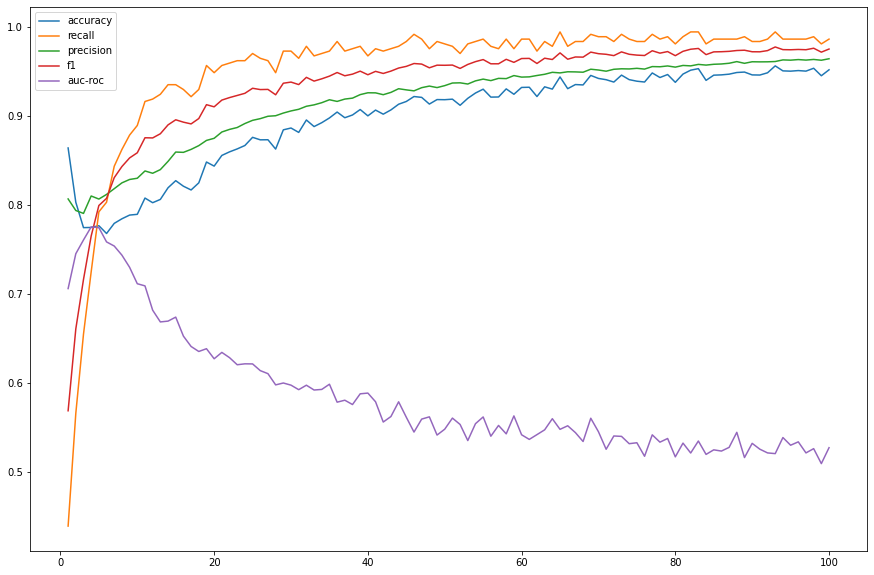

In [28]:
plt.figure(figsize = (15, 10))
plt.plot(list_index_valid_upsampled, list_accuracy_valid_upsampled, label = 'accuracy')
plt.plot(list_index_valid_upsampled, list_recall_valid_upsampled, label = 'recall')
plt.plot(list_index_valid_upsampled, list_precision_valid_upsampled, label = 'precision')
plt.plot(list_index_valid_upsampled, list_f1_valid_upsampled, label = 'f1')
plt.plot(list_index_valid_upsampled, list_auc_roc_valid_upsampled, label = 'auc-roc')
plt.legend(loc = 'upper left')
plt.show()

При увеличении выборки были получены следующие результаты: метрика `accuracy` в среднем повысилась примерно на 5%, метрика `recall` - на 40%, метрика `precision` - на 10%, метрика `f1` - на 40%. Метрика же `auc-roc` изменяется не однозначно: вначале увеличение примерно на 7%, затем уменьшение примерно на 20%.

Таким образом, нельзя однозначно сделать вывод о том, что увеличение выборки идет на увеличение качества модели. Так как все метрики, кроме `auc-roc`, при значительном увеличении выборки растут, определим наилучшее качество модели по метрике `auc-roc`, а также определим значения остальных метрик:

In [29]:
best_result_auc_roc_valid_upsampled = 0
best_result_f1_valid_upsampled = 0
best_result_recall_valid_upsampled = 0
best_result_precision_valid_upsampled = 0
best_result_accuracy_valid_upsampled = 0
best_iteration_accuracy_valid_upsampled = 0

for index in range(1, 100):
    if best_result_auc_roc_valid_upsampled < list_auc_roc_valid_upsampled[index]:
        best_result_auc_roc_valid_upsampled = list_auc_roc_valid_upsampled[index]
        best_result_f1_valid_upsampled = list_f1_valid_upsampled[index]
        best_result_recall_valid_upsampled = list_recall_valid_upsampled[index]
        best_result_precision_valid_upsampled = list_precision_valid_upsampled[index]
        best_result_accuracy_valid_upsampled = list_accuracy_valid_upsampled[index]
        best_iteration_accuracy_valid_upsampled = index
        
print('AUC-ROC:', best_result_auc_roc_valid_upsampled)
print('F1-мера:', best_result_f1_valid_upsampled)
print('Полнота:', best_result_recall_valid_upsampled)
print('Точность:', best_result_precision_valid_upsampled)
print('Accuracy:', best_result_accuracy_valid_upsampled)
print('Итерация:', best_iteration_accuracy_valid_upsampled)

AUC-ROC: 0.7755171181367364
F1-мера: 0.7652916073968705
Полнота: 0.7250673854447439
Точность: 0.8102409638554217
Accuracy: 0.7748976807639836
Итерация: 3


### Уменьшение выборки

In [30]:
list_accuracy_valid_downsampled = []
list_recall_valid_downsampled = []
list_precision_valid_downsampled = []
list_f1_valid_downsampled = []
list_auc_roc_valid_downsampled = []
list_index_valid_downsampled = []
iteration = 0

for index in range(1, 100, 1):
    features_valid_downsampled, target_valid_downsampled = downsample(features_valid, target_valid, fraction = (101 - index) / 100)
    features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, fraction = (101 - index) / 100)
    
    model_valid_downsampled = RandomForestClassifier(random_state = 12345, n_estimators = 11, max_depth = 7)
    
    model_valid_downsampled.fit(features_train_downsampled, target_train_downsampled)
    answer_valid_downsampled = model_valid_downsampled.predict(features_valid_downsampled)
    
    accuracy_valid_downsampled = sklm.accuracy_score(answer_valid_downsampled, target_valid_downsampled)
    recall_valid_downsampled = sklm.recall_score(target_valid_downsampled, answer_valid_downsampled)
    precision_valid_downsampled = sklm.precision_score(target_valid_downsampled, answer_valid_downsampled)
    f1_valid_downsampled = sklm.f1_score(target_valid_downsampled, answer_valid_downsampled)
    auc_roc_valid_downsampled = sklm.roc_auc_score(target_valid_downsampled, answer_valid_downsampled)
    iteration += 1
    
    list_accuracy_valid_downsampled.append(accuracy_valid_downsampled)
    list_recall_valid_downsampled.append(recall_valid_downsampled)
    list_precision_valid_downsampled.append(precision_valid_downsampled)
    list_f1_valid_downsampled.append(f1_valid_downsampled)
    list_auc_roc_valid_downsampled.append(auc_roc_valid_downsampled)
    list_index_valid_downsampled.append(iteration)

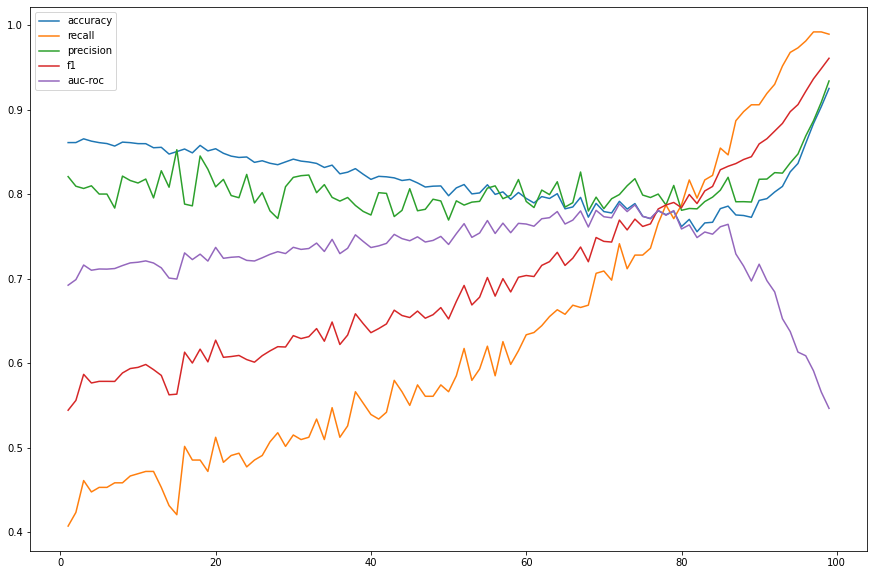

In [31]:
plt.figure(figsize = (15, 10))
plt.plot(list_index_valid_downsampled, list_accuracy_valid_downsampled, label = 'accuracy')
plt.plot(list_index_valid_downsampled, list_recall_valid_downsampled, label = 'recall')
plt.plot(list_index_valid_downsampled, list_precision_valid_downsampled, label = 'precision')
plt.plot(list_index_valid_downsampled, list_f1_valid_downsampled, label = 'f1')
plt.plot(list_index_valid_downsampled, list_auc_roc_valid_downsampled, label = 'auc-roc')
plt.legend(loc = 'best')
plt.show()

При уменьшении выборки были получены следующие результаты: все метрики, кроме `auc-roc`, значительно увеличиваются, `auc-roc` понижается примерно на 25%. Однако ее максимальное значение достигается примено на 70-й итерации, что означает, что примено 70% выборки удалены, что очень негативно влияет на точность результатов исследования. Поэтому определим наилучшее качество модели по метрике `auc-roc` только до 40 итерации (т.е. максимум удаляем 40% выборки), а также определим значения остальных метрик:

In [32]:
best_result_auc_roc_valid_downsampled = 0
best_result_f1_valid_downsampled = 0
best_result_recall_valid_downsampled = 0
best_result_precision_valid_downsampled = 0
best_result_accuracy_valid_downsampled = 0
best_iteration_accuracy_valid_downsampled = 0

for index in range(1, 40):
    if best_result_auc_roc_valid_downsampled < list_auc_roc_valid_downsampled[index]:
        best_result_auc_roc_valid_downsampled = list_auc_roc_valid_downsampled[index]
        best_result_f1_valid_downsampled = list_f1_valid_downsampled[index]
        best_result_recall_valid_downsampled = list_recall_valid_downsampled[index]
        best_result_precision_valid_downsampled = list_precision_valid_downsampled[index]
        best_result_accuracy_valid_downsampled = list_accuracy_valid_downsampled[index]
        best_iteration_accuracy_valid_downsampled = index
        
print('AUC-ROC:', best_result_auc_roc_valid_downsampled)
print('F1-мера:', best_result_f1_valid_downsampled)
print('Полнота:', best_result_recall_valid_downsampled)
print('Точность:', best_result_precision_valid_downsampled)
print('Accuracy:', best_result_accuracy_valid_downsampled)
print('Итерация:', best_iteration_accuracy_valid_downsampled)

AUC-ROC: 0.7517688679245282
F1-мера: 0.658307210031348
Полнота: 0.5660377358490566
Точность: 0.7865168539325843
Accuracy: 0.8300857365549493
Итерация: 37


Таким образом, по 4 из 5 выборок (кроме `accuracy`) значение метрик при увеличении выборки значительно больше, чем при уменьшении или учеличении веса редкого класса. Однако `accuracy` в данном исследовании не является основной метрикой, поэтому примем увеличение выборки как лучший вариант модели при борьбе с дисбалансом. 

## Тестирование модели

### Проверка на тестовой выборке

В процессе улучшения модели была принята лучшей та, которая увеличивала выборку. Проверим ее на тестовой выборке:

In [33]:
features_test_upsampled, target_test_upsampled = upsample(features_test, target_test, repeat = 3)
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, repeat = 3)
features_valid_upsampled, target_valid_upsampled = upsample(features_valid, target_valid, repeat = 3)
    
model_test_upsampled = RandomForestClassifier(random_state = 12345, n_estimators = 11, max_depth = 7)
    
model_test_upsampled.fit(features_train_upsampled, target_train_upsampled)
answer_test_upsampled = model_test_upsampled.predict(features_test_upsampled)

print('F1-мера:', sklm.f1_score(target_test_upsampled, answer_test_upsampled))
print('Полнота:', sklm.recall_score(target_test_upsampled, answer_test_upsampled))
print('Точность:', sklm.precision_score(target_test_upsampled, answer_test_upsampled))
print('AUC-ROC:', sklm.roc_auc_score(target_test_upsampled, answer_test_upsampled))
print('Accuracy:', sklm.accuracy_score(answer_test_upsampled, target_test_upsampled))

F1-мера: 0.703960396039604
Полнота: 0.6388140161725068
Точность: 0.7839029768467475
AUC-ROC: 0.7516806777476218
Accuracy: 0.76640625


### Проверка качества модели на тестовой + валидационной выборках

Объединим тестовую и валидационную выборки в одну и проверим, как изменится качество модели:

In [34]:
features_valid_test = pd.concat([features_test_upsampled, features_valid_upsampled], axis = 0)
target_valid_test = pd.concat([target_test_upsampled, target_valid_upsampled], axis = 0)
answer_valid_test = model_test_upsampled.predict(features_valid_test)

print('F1-мера:', sklm.f1_score(target_valid_test, answer_valid_test))
print('Полнота:', sklm.recall_score(target_valid_test, answer_valid_test))
print('Точность:', sklm.precision_score(target_valid_test, answer_valid_test))
print('AUC-ROC:', sklm.roc_auc_score(target_valid_test, answer_valid_test))
print('Accuracy:', sklm.accuracy_score(answer_valid_test, target_valid_test))

F1-мера: 0.7102342786683108
Полнота: 0.6469002695417789
Точность: 0.7873154729360307
AUC-ROC: 0.7562653333891969
Accuracy: 0.7705526264401484


### Проверка качества модели на валидационной + тренировочной выборках

Объединим валидационную и тренировочную выборки в качестве одной обучающей и проверим, как изменится качество модели:

In [35]:
features_valid_train = pd.concat([features_valid_upsampled, features_train_upsampled], axis = 0)
target_valid_train = pd.concat([target_valid_upsampled, target_train_upsampled], axis = 0)
answer_valid_train = model_test_upsampled.predict(features_valid_train)

print('F1-мера:', sklm.f1_score(target_valid_train, answer_valid_train))
print('Полнота:', sklm.recall_score(target_valid_train, answer_valid_train))
print('Точность:', sklm.precision_score(target_valid_train, answer_valid_train))
print('AUC-ROC:', sklm.roc_auc_score(target_valid_train, answer_valid_train))
print('Accuracy:', sklm.accuracy_score(answer_valid_train, target_valid_train))

F1-мера: 0.7655421686746988
Полнота: 0.7140930546190155
Точность: 0.8249805245390808
AUC-ROC: 0.7988427276549309
Accuracy: 0.809942377185272


### График изменений метрик

Создадим график изменений метрик по 5 точкам - до борьбы с дисбалансом, при увеличении выборки, проверка на тестовой выборке, проверка на тестовой + валидационной выборках, проверка на валидационной + тренировочной выборках:

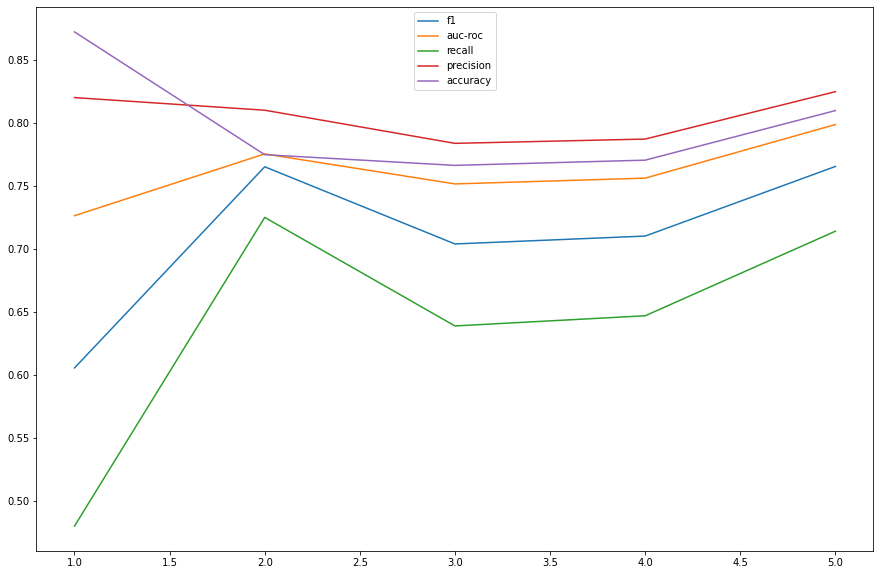

In [36]:
f1 = [0.6054421768707483, 0.7652916073968705, 0.703960396039604, 0.7102342786683108, 0.7655421686746988]
auc_roc = [0.7264253324596803, 0.7755171181367364, 0.7516806777476218, 0.7562653333891969, 0.7988427276549309]
recall = [0.4797843665768194, 0.7250673854447439, 0.6388140161725068, 0.6469002695417789, 0.7140930546190155]
precision = [0.8202764976958525, 0.8102409638554217, 0.7839029768467475, 0.7873154729360307, 0.8249805245390808]
accuracy = [0.8724573941726224, 0.7748976807639836, 0.76640625, 0.7705526264401484, 0.809942377185272]
points = [1, 2, 3, 4, 5]

plt.figure(figsize = (15, 10))
plt.plot(points, f1, label = 'f1')
plt.plot(points, auc_roc, label = 'auc-roc')
plt.plot(points, recall, label = 'recall')
plt.plot(points, precision, label = 'precision')
plt.plot(points, accuracy, label = 'accuracy')
plt.legend(loc = 'upper center')
plt.show()

### ROC-кривая

Для модели, увеличивающей выборку, проведем AUC-ROC исследование. Построим ROC-кривую:

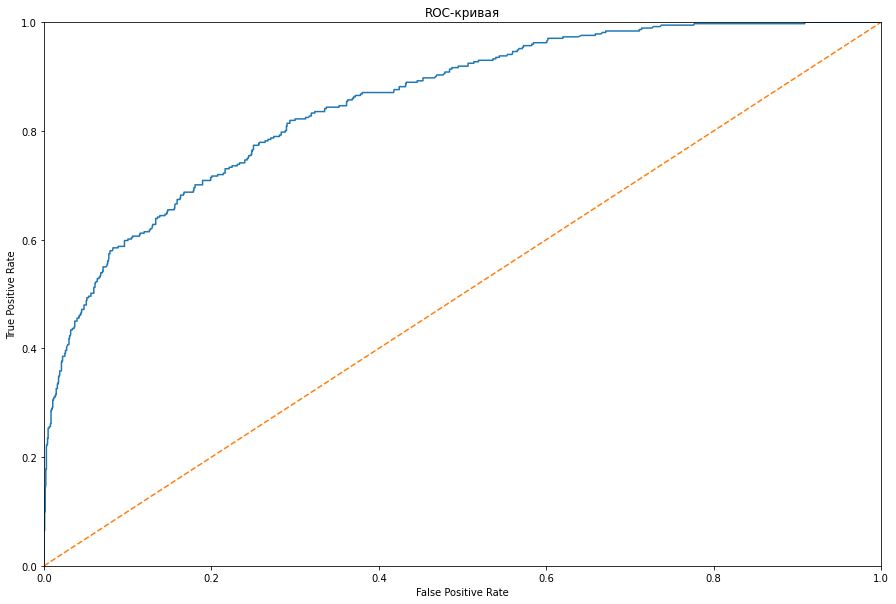

In [37]:
answers_roc_test = model_test_upsampled.predict_proba(features_test)
answers_one_test = answers_roc_test[:, 1]

fpr, tpr, thresholds = sklm.roc_curve(target_test, answers_one_test) 

plt.figure(figsize = (15, 10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

## Выводы

В процессе исследования были проведены: подготовка данных, исследование модели, борьба с дисбалансом, тестирование модели.

В процессе подготовки данных были проведены: проверка на дубликаты, пропуски, удалена информация, не влияющая на обучение модели, данные приведены к общему масштабу, была применена техника OHE для категоральных переменных. Также было проведено разбиение на обучающую, валидационную и тестовую выборки.

Во время исслдования модели был проведен анализ дисбаланса - выяснилось, что значений с target = 1 примерно в 4 раза меньше. Обучение модели было произведено на алгоритмах DT, LR, RF. Моделью с наибольшиим значениями F1-меры и AUC-ROC была принята модель RF с гиперпараметрами n_estimators = 11 и max_depth = 7.

В ходе борьбы с дисбаласом анализ проводился по трем вариантам: увеличение веса редкого класса, увеличение и уменьшение выборки. При увеличение веса редкого класса было получено, что значение метрики F1-меры незначительно снизилось - менее, чем на 1%, а метрики AUC-ROC - наоборот - повысилось примено на 4%. При увеличении выборки заметен рост обоих метрик - F1-меры - на 26.4%, AUC-ROC - на 6.7%. При уменьшении выборки также наблюдается рост значений метрик, однако, уже не такой значительный, как при увеличении - F1-меры - на 8.7%, AUC-ROC - на 3.5%. Поэтому наиболее удачной была принята модель, увеличивающая выборку (на третьей итерации).

В ходе тестирования модели проводилась проверка на тестовой выборке, на тестовой + валидационной, а также был построен график, отражающий изменения качества метрик по 5 точкам - до борьбы с дисбалансом, при увеличении выборки, проверка на тестовой выборке, проверка на валидационной + тренировочной выборках. Были сделаны следующие выводы:
1. Несмотря на уменьшение значений всех метрик при тестировании на 2 тестовых выборках, оно качество модели увеличилось, по сравнению с моделью, не учитывающую дисбаланс. Т.е. при увеличении тестовой выборки (с 20% до 40%) качество улучшенной модели снизилось, но больше, чем качество модели, не учитывающей дисбаланс. 
2. При увеличении обучающей выборки (с 60% до 80%) качество модели по всем метрикам увеличилось по сравнению с увеличеним тестовой выборки, однако вернулось примерно на тот же уровень, что и при увеличении выборки при отношении обучающей и валидационной выборок 60% к 20%. Т.е. при увеличении обучающей выборки качество модели заметно не улучшилось, а по некоторым метрикам (F1-мера, точность, полнота) осталось таким же.
3. Значения основных метрик - F1-мера и AUC-ROC - значительно возрасли даже с учетом уменьшения качества при тестировании - на 16.3% и 6.8% соответственно на тестовой выборке, на 11.5% и 3.8% соответственно на тестовой + валидационной выборках.

Таким образом, мы получили улучшенную модель, с хорошими значениями метрик с заданной точностью (F1-мера минимум 0.59).